In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

In [2]:
df_sales =pd.read_csv("sales data-set.csv")
df_stores =pd.read_csv("stores data-set.csv")
df_features = pd.read_csv("Features data set.csv")

In [3]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [4]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
df_sales.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5 non-null      int64  
 1   Dept          5 non-null      int64  
 2   Date          5 non-null      object 
 3   Weekly_Sales  5 non-null      float64
 4   IsHoliday     5 non-null      bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 297.0+ bytes


In [7]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [8]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [9]:
df_features['Date'] = pd.to_datetime(df_features['Date'],dayfirst=True)
df_sales['Date'] = pd.to_datetime(df_sales['Date'],dayfirst=True)

In [10]:
sales_features = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='inner')

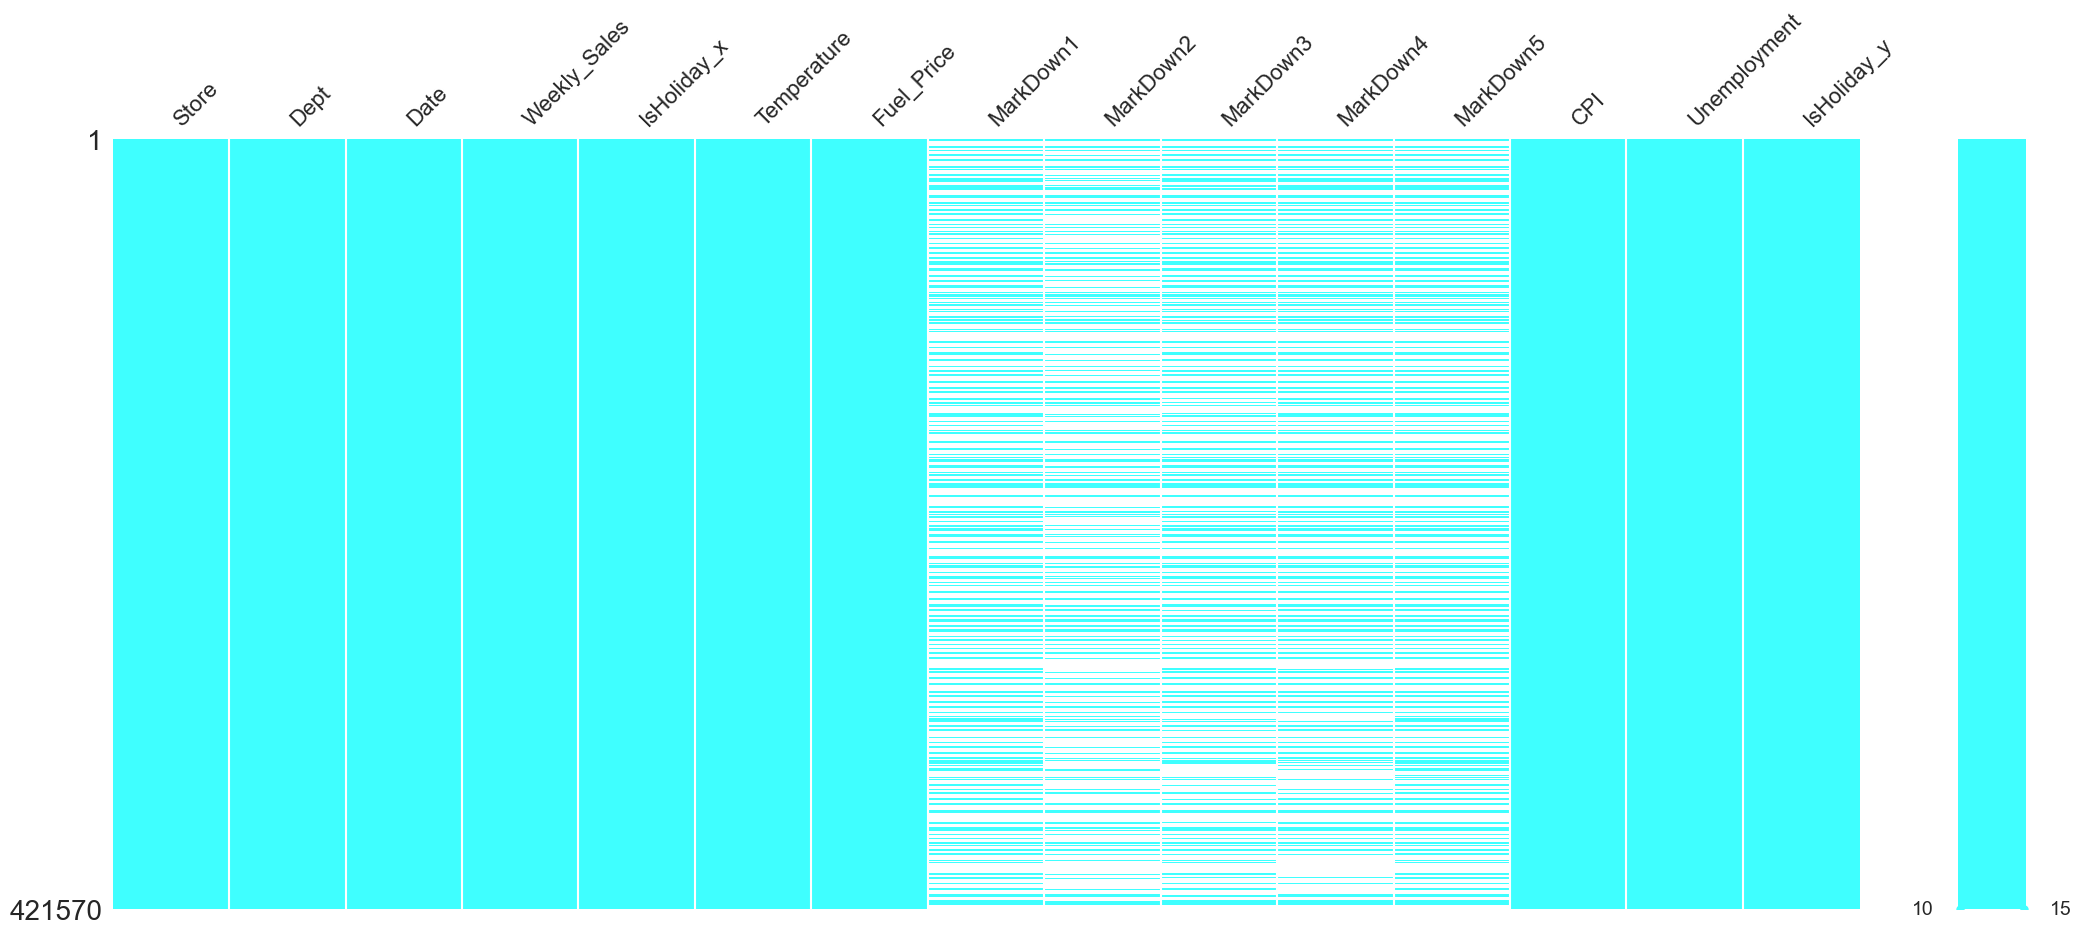

In [11]:
sns.set_style("whitegrid")
msno.matrix(sales_features,figsize=(25, 10),
    width_ratios=(15, 1),
    color=(0.25,1.0 ,1.0),    fontsize=16,
    labels=None,
    label_rotation=45,
    sparkline=True,)
plt.show()

# **Overall Sales Trend Over Time**

ANALYZE:

    Total Weakly Sales is critical near the end of the December and January

    End of January the sales is very low

    After 2012 the sales increases in the middle year.





In [12]:
sales_features["Date"] = pd.to_datetime(sales_features["Date"])

In [13]:
sales_trend = sales_features.groupby('Date')['Weekly_Sales'].sum().reset_index()

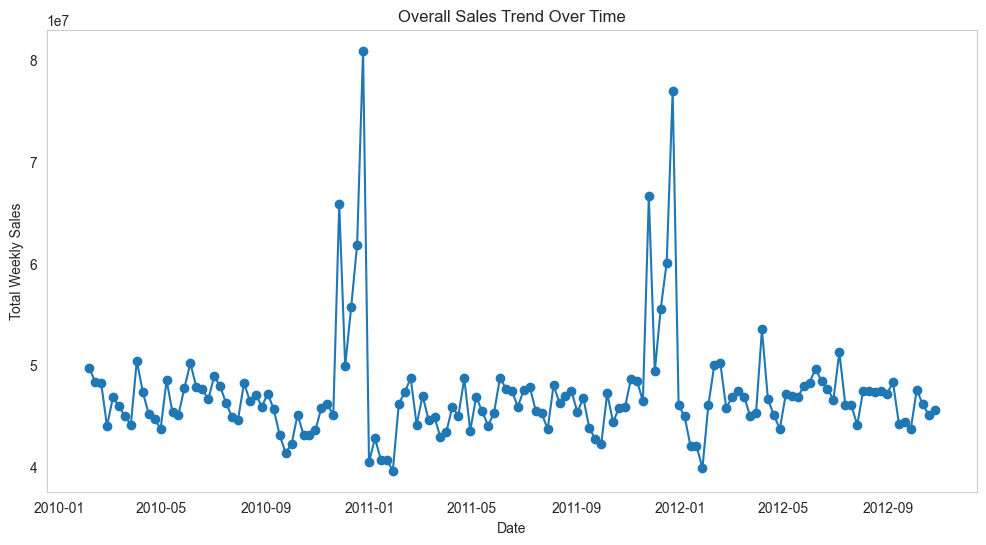

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(sales_trend['Date']), sales_trend['Weekly_Sales'], marker='o', linestyle='-')
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid()
plt.show()

# **Sales Across Different Store Types**

ANALYZE:

    Store Type A has the highest sales

    Store Type B has the second highest sales aproximate haft Type A.

    Store Type C has the lowest sales

In [15]:
sales_stores = pd.merge(df_sales, df_stores, on='Store', how='inner')

In [16]:
type_sales = sales_stores.groupby('Type')['Weekly_Sales'].sum()

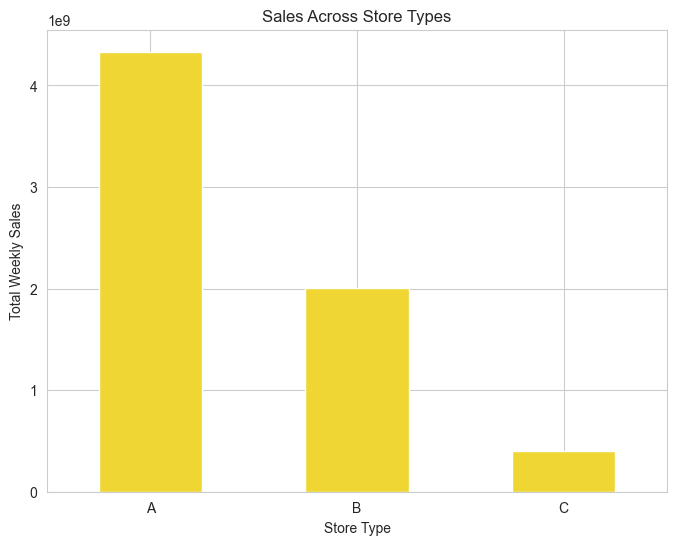

In [17]:
type_sales.plot(kind='bar', figsize=(8, 6), color='#f0d632')
plt.title('Sales Across Store Types')
plt.xlabel('Store Type')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=0)
plt.show()

# **Sales During Holiday vs. Non-Holiday Weeks**

ANALYZE:

    Holiday sales is significantly higher than non-holiday sales

In [18]:
holiday_sales = df_sales.groupby('IsHoliday')['Weekly_Sales'].sum()

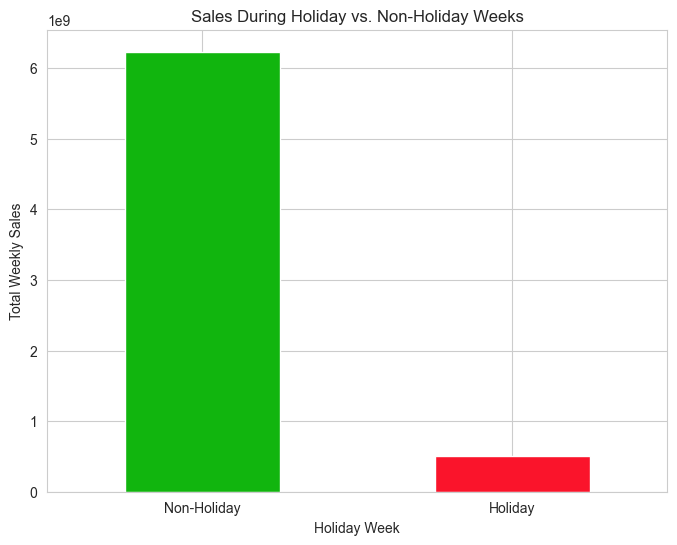

In [19]:
holiday_sales.plot(kind='bar', figsize=(8, 6), color=['#11b50e', '#fa142b'])
plt.title('Sales During Holiday vs. Non-Holiday Weeks')
plt.xlabel('Holiday Week')
plt.ylabel('Total Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

# **Departments with the Highest Weekly Sales**

Top 1 department is "92".
top 10 department is "8".


In [20]:
dept_sales = df_sales.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)

In [21]:
top_depts = dept_sales.head(10)

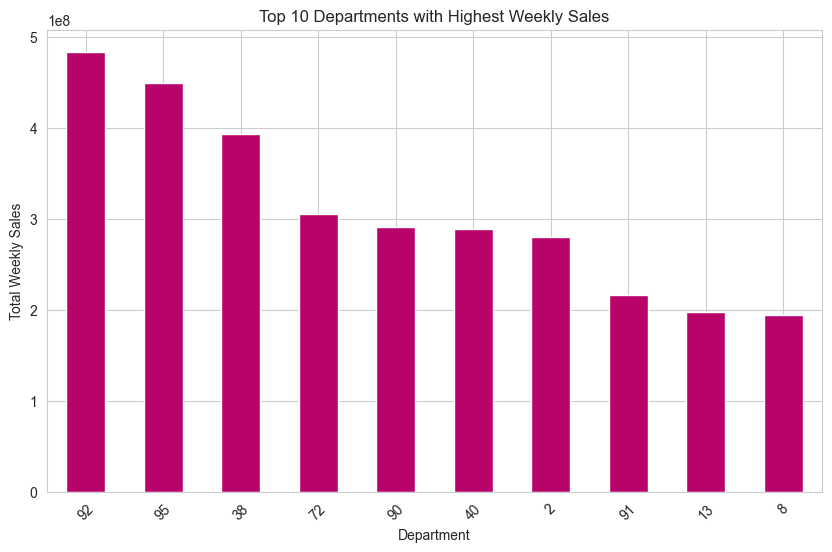

In [22]:
top_depts.plot(kind='bar', figsize=(10, 6), color='#b8046a')
plt.title('Top 10 Departments with Highest Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.show()

# **Correlation Between Store Size and Weekly Sales**

The highest weekly sales is from 110000 to 130000 but this is the single point.
=> this is the expect.
Store sizes are near 40000, 12500, 15000, 200000, the weekly sales is very near from 0 ti 190000.


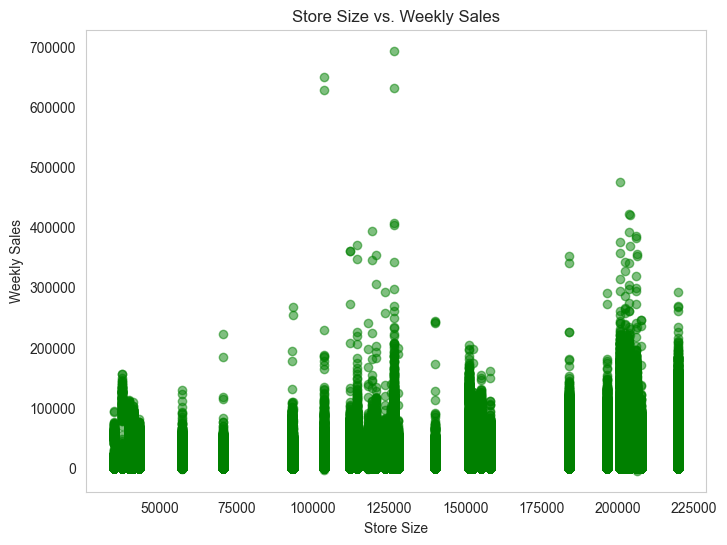

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(sales_stores['Size'], sales_stores['Weekly_Sales'], alpha=0.5, color='green')
plt.title('Store Size vs. Weekly Sales')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales')
plt.grid()
plt.show()

# **Effect of Markdown Promotions on Sales**

No MarkdownPromotions has total weekly sales equal twice markdownPromotions
We should be able to using Markdown Promotions to attract the customers buy more than.

In [24]:
sales_features['Has_Markdown'] = sales_features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].notna().any(axis=1)

In [25]:
markdown_sales = sales_features.groupby('Has_Markdown')['Weekly_Sales'].sum()

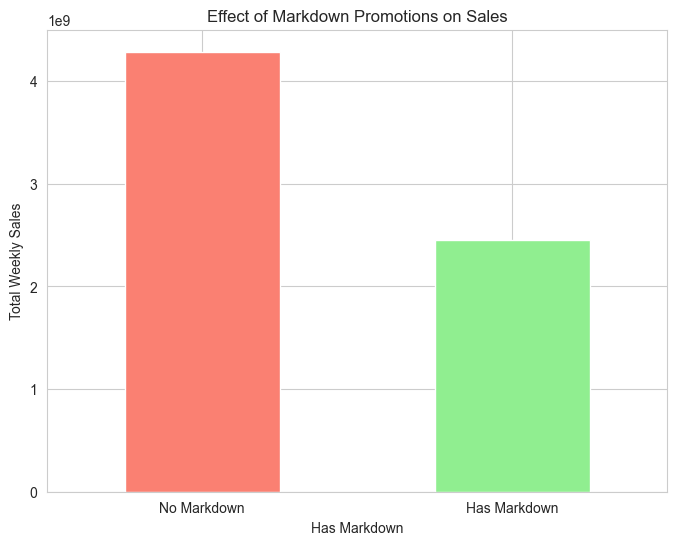

In [26]:
markdown_sales.plot(kind='bar', figsize=(8, 6), color=['salmon', 'lightgreen'])
plt.title('Effect of Markdown Promotions on Sales')
plt.xlabel('Has Markdown')
plt.ylabel('Total Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['No Markdown', 'Has Markdown'], rotation=0)
plt.show()

# **Temperature vs. Weekly Sales**

The temperature from 30 to 75 has the weekly sales more than other.

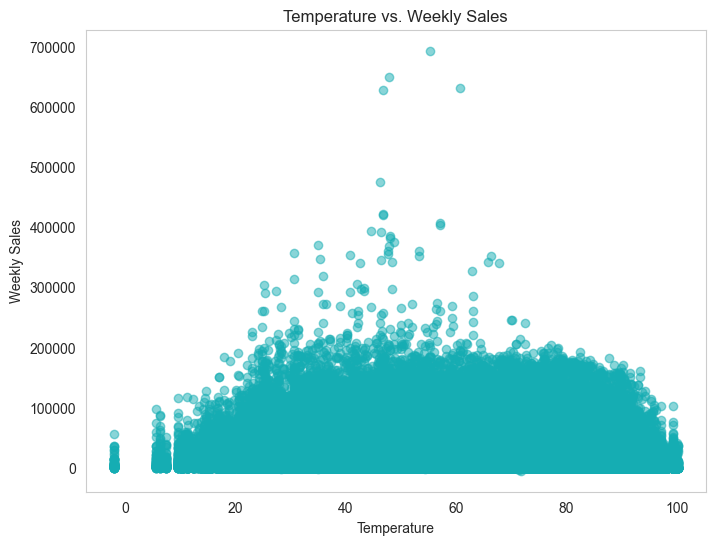

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(sales_features['Temperature'], sales_features['Weekly_Sales'], alpha=0.5, color='#15adb3')
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid()
plt.show()

# **Correlation Between Fuel Prices and Weekly Sales**

Fuel Prices is from 2.75 to 3.75 has more expect points than other.
4.4 and lower 2.5 has no Fuel price.

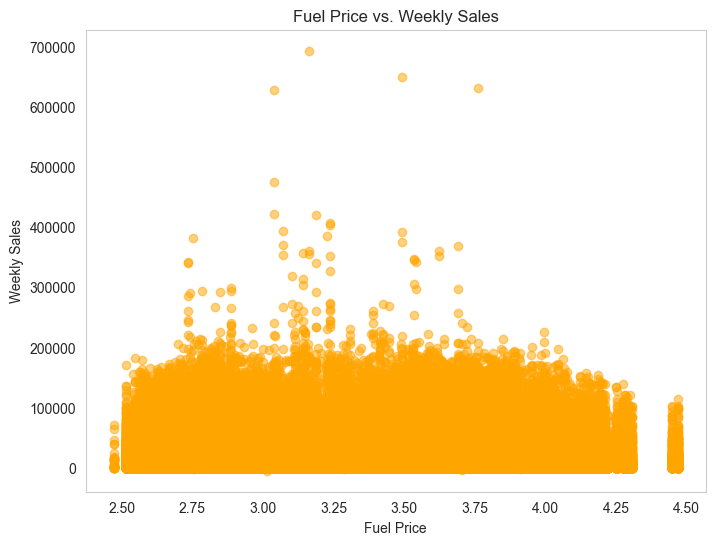

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(sales_features['Fuel_Price'], sales_features['Weekly_Sales'], alpha=0.5, color='orange')
plt.title('Fuel Price vs. Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.grid()
plt.show()

# **Unemployment Rate vs. Weekly Sales**

The Unemployment Rate from 5 to 9 has more expected points other.
The Unemployment Rate in the middle is has more Weakly Sales.

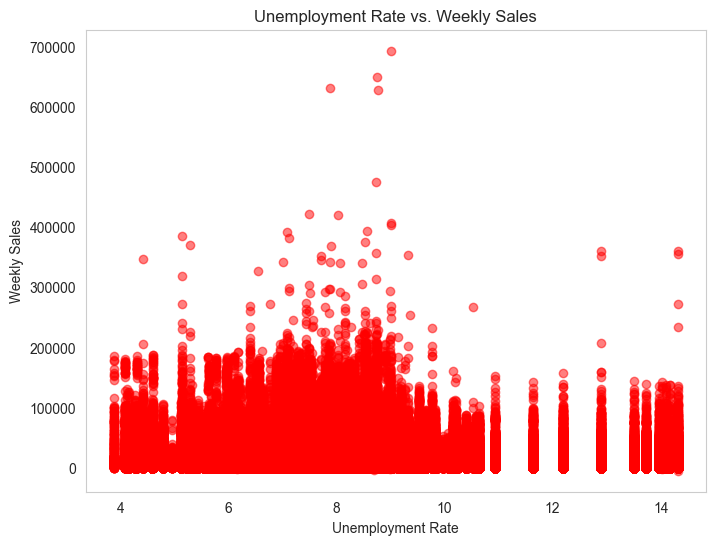

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(sales_features['Unemployment'], sales_features['Weekly_Sales'], alpha=0.5, color='red')
plt.title('Unemployment Rate vs. Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.grid()
plt.show()

# **CPI vs. Weekly Sales**

CPI from 141 to 180 is no Weekly Sales
CPI lower 140 has more Weakly Sales than other
Weakly Sales nearly 200000 is in almost CPI (expect 140 to 180)

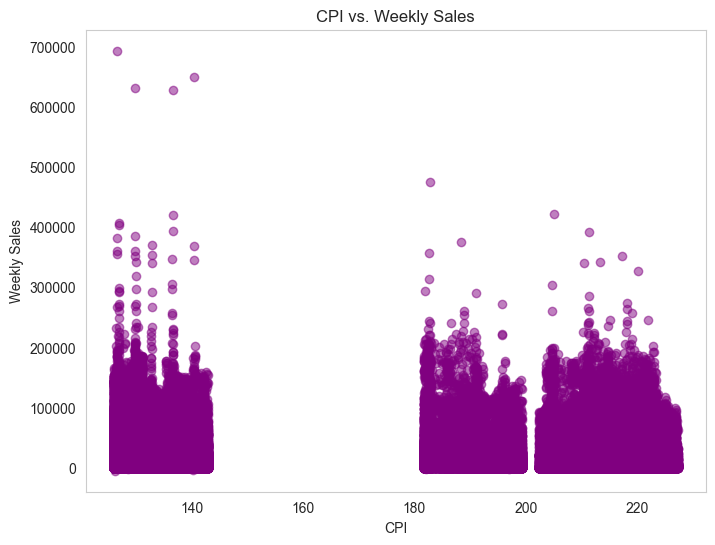

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(sales_features['CPI'], sales_features['Weekly_Sales'], alpha=0.5, color='purple')
plt.title('CPI vs. Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.grid()
plt.show()

# **Fuel_Price**

from middle of 2011-04 the Fuel price has the expected point.
from 2011-04 to 2012 - 04 the Fuel price has the highest Fuel price and this is 
the Fuel price is not balanced between 2011-04 and 2013 - 04. After that is OK.

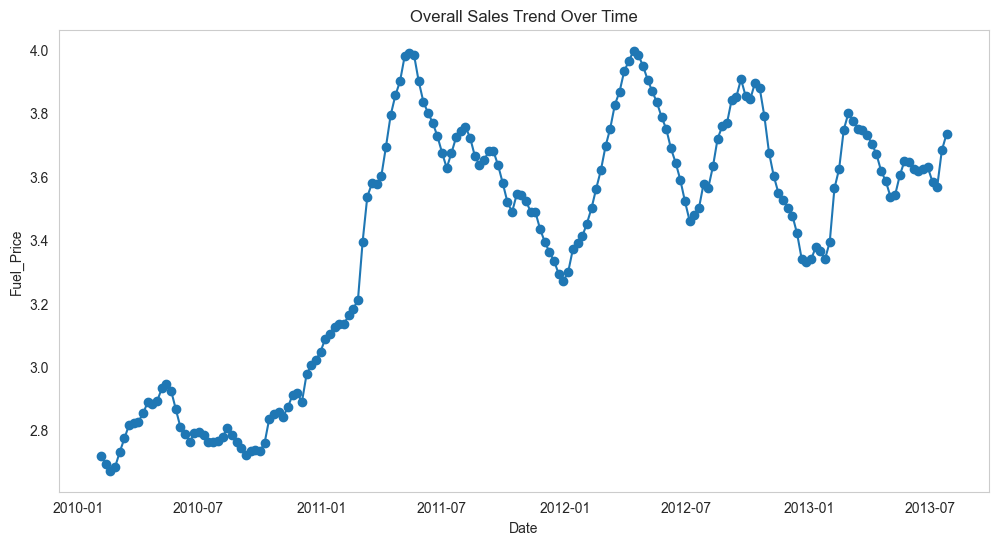

In [31]:
Price_time = df_features.groupby('Date')['Fuel_Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(Price_time['Date']), Price_time['Fuel_Price'], marker='o', linestyle='-')
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Fuel_Price')
plt.grid()
plt.show()

# **Type_tem**

The average temperature in store A is near 60.
The average temperature in store B is the lowest with index 55.
The average temperature in store B is the highest with index 65.

but the weakly sales data of A is the highest and C is the lowest.

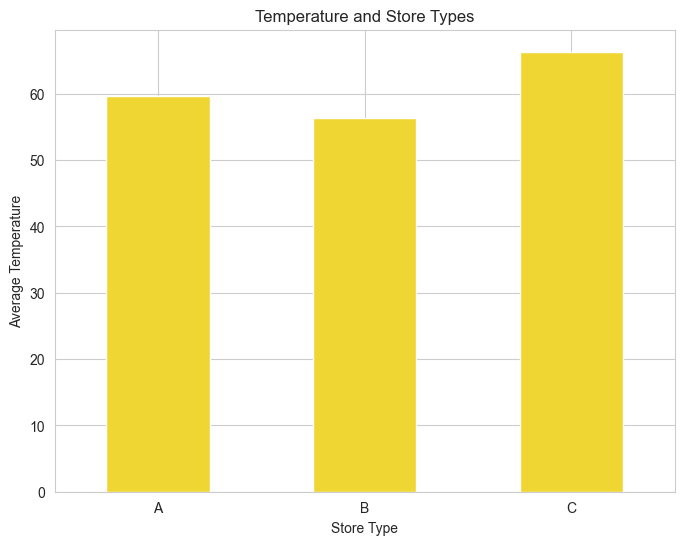

In [32]:
sales_type_temp = pd.merge(df_stores, df_features, on='Store', how='inner')

type_sales = sales_type_temp.groupby('Type')['Temperature'].mean() # sum or mean

type_sales.plot(kind='bar', figsize=(8, 6), color='#f0d632')
plt.title('Temperature and Store Types')
plt.xlabel('Store Type')
plt.ylabel('Average Temperature')
plt.xticks(rotation=0)
plt.show()

# sales_features()

In [33]:
# # df_features['Date'] = pd.to_datetime(df_features['Date'],dayfirst=True)
# # df_sales['Date'] = pd.to_datetime(df_sales['Date'],dayfirst=True)

# sales_features = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='inner')

# # def sales_features_bar():
# #     sns.set_style("whitegrid")
# #     msno.matrix(sales_features,figsize=(25, 10),
# #         width_ratios=(15, 1),
# #         color=(0.25,1.0 ,1.0),    fontsize=16,
# #         labels=None,
# #         label_rotation=45,
# #         sparkline=True,)
# #     plt.show()

# # sales_features_bar()



# sales_features["Date"] = pd.to_datetime(sales_features['Date'])

# Price_time = df_features.groupby('Date')['Fuel_Price'].mean().reset_index()

# plt.figure(figsize=(12, 6))
# plt.plot(pd.to_datetime(Price_time['Date']), Price_time['Fuel_Price'], marker='o', linestyle='-')
# plt.title('Overall Mean Fuel Price')
# plt.xlabel('Date')
# plt.ylabel('Fuel Price')
# plt.grid()
# plt.show()


In [34]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE

# # Xử lý giá trị thiếu
# df_features.fillna(df_features.mean(), inplace=True)

# # Tách biến đầu vào (X) và đầu ra (y)
# X = df_features.drop(columns=["Fuel_Price"])  # Class là nhãn cần dự đoán
# y = df_features["Fuel_Price"]

# # Chuẩn hóa dữ liệu
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Cân bằng dữ liệu
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# # Chia tập train-test
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [35]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report

# models = {
#     "Logistic Regression": LogisticRegression(max_iter=5000),
#     "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
#     # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
#     # "SVM": SVC(kernel="rbf"),
#     # "KNN": KNeighborsClassifier(n_neighbors=5)
# }

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print(f"{name}: Accuracy = {acc:.4f}")
#     print(classification_report(y_test, y_pred))
#     print("-" * 50)


Using "Weekly_Sales" to create models and analyze
Using SMOTE to balance the data.
Test model contains RandomForest, LogisticRegression, KNN, XGBoost.
SVC model is very slow so it can't show the results.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# Chuyển đổi cột 'Date' về dạng datetime
df_features['Date'] = pd.to_datetime(df_features['Date'], dayfirst=True)
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True)

# Gộp dữ liệu
df = pd.merge(df_sales, df_features, on=['Store', 'Date'], how='inner')
df = pd.merge(df, df_stores, on='Store', how='inner')

# Xử lý giá trị thiếu
imputer = SimpleImputer(strategy="mean")
df_filled = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=np.number)), columns=df.select_dtypes(include=np.number).columns)

# Thêm lại các cột không phải số
# df_filled["IsHoliday"] = df["IsHoliday"]
df["IsHoliday"] = df.get("IsHoliday", np.nan)

# Chọn đầu vào và đầu ra
X = df_filled.drop(columns=["Weekly_Sales"])  # Biến đầu vào
y = df_filled["Weekly_Sales"] > df_filled["Weekly_Sales"].median()  # Phân loại thành 2 nhóm

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Chia tập train-test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Huấn luyện và đánh giá mô hình
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    # "SVM": SVC(kernel="rbf"),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Logistic Regression: Accuracy = 0.5900
              precision    recall  f1-score   support

       False       0.60      0.54      0.57     42252
        True       0.58      0.64      0.61     42063

    accuracy                           0.59     84315
   macro avg       0.59      0.59      0.59     84315
weighted avg       0.59      0.59      0.59     84315

--------------------------------------------------


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:07:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Accuracy = 0.9556
              precision    recall  f1-score   support

       False       0.95      0.96      0.96     42252
        True       0.96      0.95      0.96     42063

    accuracy                           0.96     84315
   macro avg       0.96      0.96      0.96     84315
weighted avg       0.96      0.96      0.96     84315

--------------------------------------------------
Random Forest: Accuracy = 0.8737
              precision    recall  f1-score   support

       False       0.86      0.90      0.88     42252
        True       0.89      0.85      0.87     42063

    accuracy                           0.87     84315
   macro avg       0.87      0.87      0.87     84315
weighted avg       0.87      0.87      0.87     84315

--------------------------------------------------
KNN: Accuracy = 0.7311
              precision    recall  f1-score   support

       False       0.73      0.73      0.73     42252
        True       0.73      0.73      0.73     4206

Results:

- XGBoost is the best model with the Accuracy is 0.9556

- Random Forest is the second best model with the Accuracy is 0.8737

- KNN is the third best model with the Accuracy is 0.7311

- Logistic Regression is the fourth best model with the Accuracy is 0.59

- precision and recall in models is nearly. The balance of data is good and trusted.

In [ ]:
models = {
    # "Logistic Regression": LogisticRegression(max_iter=5000),
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    # "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf"),
    # "KNN": KNeighborsClassifier(n_neighbors=5, algorithm= "auto")
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
